In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [71]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("C:\\Users\\cheta\\Downloads\\cars24-car-price-clean.csv")

In [3]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [24]:
X = df.model.values
y = df.selling_price.values

In [30]:
x = X.reshape(X.size,1)
y = y.reshape(y.size,1)

## Linear Regression using single feature in the model

In [32]:
linear = LinearRegression()
linear.fit(x,y)

LinearRegression()

In [33]:
linear.intercept_

array([-1.18731936e-16])

In [34]:
linear.coef_

array([[0.96505112]])

In [36]:
y_hat = linear.predict(x)
y_hat

array([[-1.08634131],
       [-0.32158118],
       [-0.76220457],
       ...,
       [-0.43300319],
       [ 0.31656303],
       [ 1.00028896]])

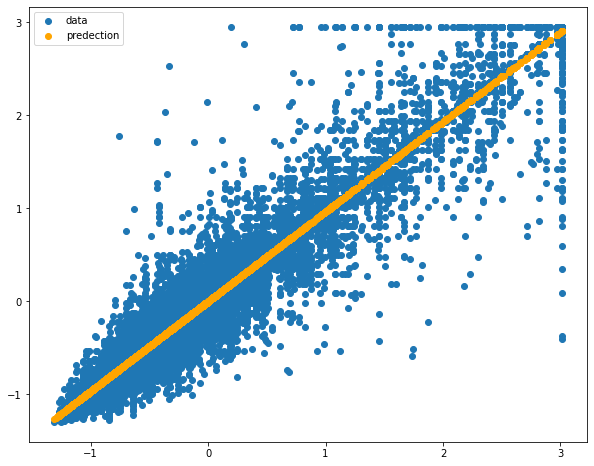

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(x,y,label='data')
plt.scatter(x,y_hat,color='orange',label='predection')
plt.legend()
plt.show()

In [38]:
linear.score(x,y)

0.9313236629576508

## Linear Regression using multiple features in the model 

### using train and test data to train and predect the model 

In [42]:
X = df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [43]:
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [44]:
linear2 = LinearRegression()

In [45]:
linear2.fit(X_train,y_train)

LinearRegression()

In [47]:
linear2.intercept_

-0.0011364789195510007

In [48]:
linear2.coef_

array([ 0.0660192 , -0.01688005, -0.04933801,  0.03041406,  0.0281798 ,
       -0.0660192 ,  0.06052994,  0.78953689, -0.01757718, -0.00291796,
        0.01413375,  0.01295761,  0.00200056, -0.02355585, -0.01320977,
       -0.0286089 , -0.03604981])

In [50]:
linear2.score(X_train,y_train)

0.9409659371358082

In [52]:
y_hat = linear2.predict(x_test)

In [53]:
linear2.score(x_test,y_test)

0.9468672408104278

In [54]:
error = y_test - y_hat

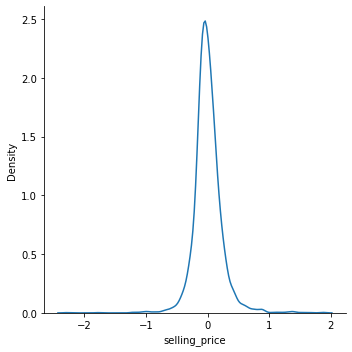

In [58]:
sns.displot(error,kind='kde')
plt.show()

In [59]:
np.mean(error)

0.005682394597754612

In [61]:
mean_squared_error(y_test,y_hat)

0.05418133487669937

In [64]:
X_sm = sm.add_constant(X)

In [65]:
X_sm.head(4)

,const,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.0,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,1.0,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,1.0,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,1.0,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728


In [68]:
sm_model = sm.OLS(y,X_sm).fit()

In [69]:
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.017e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:37:35   Log-Likelihood:                 125.84
No. Observations:               19820   AIC:                            -217.7
Df Residuals:                   19803   BIC:                            -83.48
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -4.51e-17      0.002  

In [83]:
X.shape[1]

17

## Using VIF(Variance Inflation Factor) for the features selection

In [78]:
vif = pd.DataFrame()
X_t = X
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]

C:\Users\cheta\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [88]:
vif

,Features,VIF
0,year,inf
1,km_driven,1.233320
2,mileage,3.149380
3,engine,6.272148
4,max_power,5.079379
5,age,inf
6,make,3.204460
7,model,5.801345
8,Individual,1.088775
9,Trustmark Dealer,1.020599


In [85]:
X.columns

Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'age', 'make',
       'model', 'Individual', 'Trustmark Dealer', 'Diesel', 'Electric', 'LPG',
       'Petrol', 'Manual', '5', '>5'],
      dtype='object')

In [89]:
cols2 = ['engine','model','max_power','make','mileage','Manual','Diesel','Petrol','LPG','km_driven','Electric','Individual','Trustmark Dealer','5']

In [90]:
X2 = X[cols2]
X2_sm = sm.add_constant(X2)
sm_model = sm.OLS(y,X2_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.983e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        10:39:49   Log-Likelihood:                -1276.9
No. Observations:               19820   AIC:                             2584.
Df Residuals:                   19805   BIC:                             2702.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -4.51e-17      0.002  

### Taking the variables with higher vif values have higher p-value (eg:  Diesel,petrol,LPG,Electric, Trustmark Dealer)

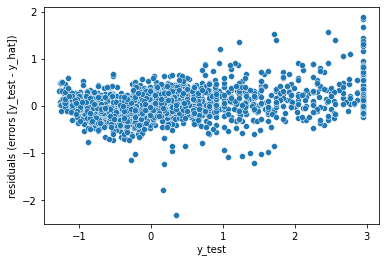

In [94]:
sns.scatterplot(x=y_test, y=error)
plt.xlabel("y_test")
plt.ylabel("residuals (errors [y_test - y_hat])")
plt.show()

### The above distribution says that it follows Homo Scedarticity 